# Deep Learning for Predicting SIRD model parameters

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display
import time
import os
from IPython.display import clear_output

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [3]:
tf.random.set_seed(1234)

## 1. Data Analysis

In [4]:
# Reading csv with all features and target values
df = pd.read_csv("Final_Smooth_Features_Spain.csv")

In [5]:
df.head()

,ISO_code,Continent,Country/Region,Date,Susceptibles Smooth (S),Infected Smooth (I),Recovered Smooth (R),Deaths Smooth (D),Mu Smooth,Beta Smooth,Gamma Smooth,Positive Test Rate Smooth,Mobility Rate Smooth
0,ESP,Europe,Spain,2020-03-21,4.731731e+07,14340.142857,247.000000,719.285714,0.014040,0.193532,0.042238,0.395,-0.528571
1,ESP,Europe,Spain,2020-03-22,4.731431e+07,17042.285714,328.714286,931.142857,0.015943,0.190061,0.032033,0.406,-0.545714
2,ESP,Europe,Spain,2020-03-23,4.731071e+07,20228.000000,460.857143,1212.428571,0.015299,0.186409,0.021829,0.416,-0.555476
3,ESP,Europe,Spain,2020-03-24,4.730669e+07,23708.857143,674.571429,1537.428571,0.017520,0.181782,0.011625,0.427,-0.563095
4,ESP,Europe,Spain,2020-03-25,4.730161e+07,28077.142857,960.714286,1969.428571,0.017607,0.173246,0.001421,0.433,-0.570714


In [6]:
df.tail()

,ISO_code,Continent,Country/Region,Date,Susceptibles Smooth (S),Infected Smooth (I),Recovered Smooth (R),Deaths Smooth (D),Mu Smooth,Beta Smooth,Gamma Smooth,Positive Test Rate Smooth,Mobility Rate Smooth
723,ESP,Europe,Spain,2022-03-14,3.604191e+07,253374.142857,1.093435e+07,102986.857143,0.000311,0.068976,0.077341,0.173,-0.062619
724,ESP,Europe,Spain,2022-03-15,3.602755e+07,245554.857143,1.095644e+07,103066.428571,0.000243,0.070035,0.077100,0.174,-0.069048
725,ESP,Europe,Spain,2022-03-16,3.601634e+07,236758.285714,1.097639e+07,103127.000000,0.000197,0.077156,0.078181,0.176,-0.075476
726,ESP,Europe,Spain,2022-03-17,3.600835e+07,226561.428571,1.099453e+07,103175.428571,0.000391,0.090718,0.079748,0.177,-0.080476
727,ESP,Europe,Spain,2022-03-18,3.599397e+07,223446.285714,1.101194e+07,103256.571429,0.000391,0.093870,0.081923,0.178,-0.076190


In [7]:
df.shape

(728, 13)

In [8]:
# Checking for no null values
df.isnull().values.any()

False

In [9]:
# Description of the dataframe
df.describe()

,Susceptibles Smooth (S),Infected Smooth (I),Recovered Smooth (R),Deaths Smooth (D),Mu Smooth,Beta Smooth,Gamma Smooth,Positive Test Rate Smooth,Mobility Rate Smooth
count,7.280000e+02,7.280000e+02,7.280000e+02,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,4.400581e+07,2.142017e+05,3.049870e+06,62736.653454,0.002118,0.083144,0.067927,0.111666,-0.109044
std,2.876306e+06,3.453587e+05,2.664096e+06,27530.805178,0.004744,0.025321,0.024817,0.088658,0.152279
min,3.599397e+07,3.541143e+03,2.470000e+02,719.285714,0.000000,0.038871,0.000573,0.015000,-0.606190
25%,4.232895e+07,5.069346e+04,4.541741e+05,32070.000000,0.000326,0.065003,0.051538,0.051000,-0.155595
50%,4.404678e+07,1.034210e+05,3.146161e+06,74554.857143,0.000801,0.078661,0.069257,0.085000,-0.073690
75%,4.671294e+07,2.243792e+05,4.853970e+06,87463.464286,0.001323,0.095254,0.085458,0.137250,-0.016429
max,4.731731e+07,1.816501e+06,1.101194e+07,103256.571429,0.037187,0.193532,0.142449,0.434000,0.091429


In [10]:
df.corr()

,Susceptibles Smooth (S),Infected Smooth (I),Recovered Smooth (R),Deaths Smooth (D),Mu Smooth,Beta Smooth,Gamma Smooth,Positive Test Rate Smooth,Mobility Rate Smooth
Susceptibles Smooth (S),1.000000,-0.585322,-0.994648,-0.883504,0.334709,0.034476,0.038632,-0.336594,-0.486470
Infected Smooth (I),-0.585322,1.000000,0.498491,0.369686,-0.190543,-0.051914,-0.259344,0.718151,0.101318
Recovered Smooth (R),-0.994648,0.498491,1.000000,0.895622,-0.332133,-0.030403,-0.009610,0.269802,0.505201
Deaths Smooth (D),-0.883504,0.369686,0.895622,1.000000,-0.439034,-0.008694,0.147159,0.048984,0.666280
Mu Smooth,0.334709,-0.190543,-0.332133,-0.439034,1.000000,0.034889,-0.026215,0.039396,-0.527138
Beta Smooth,0.034476,-0.051914,-0.030403,-0.008694,0.034889,1.000000,0.223547,0.287647,0.070637
Gamma Smooth,0.038632,-0.259344,-0.009610,0.147159,-0.026215,0.223547,1.000000,-0.355434,0.332849
Positive Test Rate Smooth,-0.336594,0.718151,0.269802,0.048984,0.039396,0.287647,-0.355434,1.000000,-0.264946
Mobility Rate Smooth,-0.486470,0.101318,0.505201,0.666280,-0.527138,0.070637,0.332849,-0.264946,1.000000


In [11]:
labels = ['Susceptibles Smooth (S)', 'Infected Smooth (I)', 'Recovered Smooth (R)', 'Deahts Smooth (D)', 
         'Positive Test Rate Smooth', 'Mobility Rate Smooth']

## 2. Data Preprocessing

In [12]:
# Obtaining data values
S = df["Susceptibles Smooth (S)"].values
I = df["Infected Smooth (I)"].values
R = df["Recovered Smooth (R)"].values
D = df["Deaths Smooth (D)"].values
Test = df["Positive Test Rate Smooth"].values
Mobility = df["Mobility Rate Smooth"].values
date = df["Date"].values

print(S[0], I[0], R[0], D[0], Test[0], Mobility[0], date[0])
S.shape, I.shape, R.shape, D.shape, Test.shape, Mobility.shape, date.shape

47317307.57142858 14340.142857142857 247.0 719.2857142857142 0.395 -0.5285714285714286 2020-03-21


((728,), (728,), (728,), (728,), (728,), (728,), (728,))

In [13]:
# Obtaining target values
mu = df["Mu Smooth"].values
beta = df["Beta Smooth"].values
gamma = df["Gamma Smooth"].values

print(mu[0], beta[0], gamma[0])
mu.shape, beta.shape, gamma.shape

0.0140397953403922 0.1935317998669637 0.0422375080523535


((728,), (728,), (728,))

**Merging features values and target values in separate arrays:**

In [14]:
# X_total array
columns = 6
X_total = np.empty((len(S), columns))

for i in range(len(X_total)):
    X_total[i] = [S[i], I[i], R[i], D[i], Test[i], Mobility[i]]

X_total.shape, X_total[0:5]

((728, 6),
 array([[ 4.73173076e+07,  1.43401429e+04,  2.47000000e+02,
          7.19285714e+02,  3.95000000e-01, -5.28571429e-01],
        [ 4.73143119e+07,  1.70422857e+04,  3.28714286e+02,
          9.31142857e+02,  4.06000000e-01, -5.45714286e-01],
        [ 4.73107127e+07,  2.02280000e+04,  4.60857143e+02,
          1.21242857e+03,  4.16000000e-01, -5.55476190e-01],
        [ 4.73066931e+07,  2.37088571e+04,  6.74571429e+02,
          1.53742857e+03,  4.27000000e-01, -5.63095238e-01],
        [ 4.73016067e+07,  2.80771429e+04,  9.60714286e+02,
          1.96942857e+03,  4.33000000e-01, -5.70714286e-01]]))

In [15]:
# y_total array
columns = 3
y_total = np.empty((len(mu), columns))

for i in range(len(y_total)):
    y_total[i] = [beta[i], gamma[i], mu[i]]

y_total.shape, y_total[0:5]

((728, 3),
 array([[0.1935318 , 0.04223751, 0.0140398 ],
        [0.19006098, 0.03203343, 0.01594338],
        [0.18640881, 0.02182934, 0.01529925],
        [0.18178154, 0.01162526, 0.01751999],
        [0.1732455 , 0.00142118, 0.01760706]]))

**Subset of total data:**

In [16]:
# Introduce the total number of data to use
# ni = int(input("Introduce the initial number you want to start your deep learning process\n"))
ni = 0
print("Initial day is assumed 0. You only need to introduce the number of total data to use.\n")
nd = int(input("Introduce the total number of data to use for the deep learning process. Notice that the data will be "
           "splitted into train and test.\n"))

# Subset of total data
X_deep = X_total[ni:ni+nd]
y_deep = y_total[ni:ni+nd]
date_deep = date[ni:ni+nd]

print(X_deep[-1], y_deep[-1], date_deep[-1])
X_deep.shape, y_deep.shape, date_deep.shape

Initial day is assumed 0. You only need to introduce the number of total data to use.

Introduce the total number of data to use for the deep learning process. Notice that the data will be splitted into train and test.
600
[ 4.22189907e+07  2.83105714e+04  4.99586100e+06  8.94517143e+04
  3.70000000e-02 -1.80952381e-02] [0.11218209 0.09414399 0.0008645 ] 2021-11-10


((600, 6), (600, 3), (600,))

In [17]:
# Selecting only the gamma parameter as the unic target value
y_deep_mu = np.empty((len(y_deep), 1))

for i in range(len(y_deep)):
    y_deep_mu[i] = y_deep[i][2]

y_deep_mu.shape, y_deep_mu[0:10]

((600, 1),
 array([[0.0140398 ],
        [0.01594338],
        [0.01529925],
        [0.01751999],
        [0.01760706],
        [0.01796094],
        [0.01763418],
        [0.01714265],
        [0.0162016 ],
        [0.01548019]]))

**Cut time series data into sequences:**

In [18]:
# Definition of the time step

time_steps = int(input("Introduce the length of the temporal series\n"))
possible_time_steps = time_steps

X_deep_series = np.empty((len(X_deep) - time_steps, time_steps, 6))
y_deep_mu_series = np.empty(((len(y_deep_mu) - time_steps, 1)))

# Creation of the sequential X and y data
for i in range(0, len(X_deep) - time_steps, 1):
    X_deep_series[i] = X_deep[i:(i+time_steps)]
    y_deep_mu_series[i] = y_deep_mu[(i+time_steps)-1]
    
len(X_deep_series), len(y_deep_mu_series), X_deep_series[0].shape, y_deep_mu_series[0].shape

Introduce the length of the temporal series
7


(593, 593, (7, 6), (1,))

**Cross-validation generator:**

In [19]:
# GroupShuffleSplit definition for cross-validation
from sklearn.model_selection import GroupShuffleSplit

groups = np.arange(len(X_deep_series))
splits = 5
gss = GroupShuffleSplit(n_splits=splits, train_size=.8, random_state=42)

**Standardization of datasets:**

In [20]:
def standarize(X_train, X_test, y_train_mu, y_test_mu):

    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
    # StandardScaler: Standardize features by removing the mean and scaling to unit variance
    from sklearn.preprocessing import StandardScaler

    # Definition of two scaler objects: one for the features and another for the targets
    feature_scaler = StandardScaler()
    target_scaler = StandardScaler()

    # Fit and transform of the objects from the train data
    X_train_S = feature_scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    y_train_mu_S = target_scaler.fit_transform(y_train_mu)

    # # Transform of the train data
    # X_train_S = feature_scaler.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    # y_train_mu_S = target_scaler.transform(y_train_mu.reshape(-1, X_train.shape[-1])).reshape(y_train_mu.shape)

    # Transform of the test data
    X_test_S = feature_scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
    y_test_mu_S = target_scaler.transform(y_test_mu)
    
    return(feature_scaler, target_scaler, X_train_S, y_train_mu_S, X_test_S, y_test_mu_S)

## 3. Deep Learning Sequential Model Definition

In [21]:
# Neuron parameters
neu = (128, 64)

In [22]:
# Dropout percentage parameter
drop_perc = 0.4

In [23]:
# Activation functions parameters
act = ('relu', 'relu')

In [24]:
# Loss function parameter
loss = 'mse'

In [25]:
# Function for creating the DL sequential model
def dl_model(train_data, y_train, test_data, y_test, neuron, act_fun, drop_perc, loss_fun):
    from keras.layers import Dense, LSTM, Dropout
    
    model = keras.Sequential()
    model.add(LSTM(neuron[0], activation=act_fun[0], return_sequences=True, input_shape=train_data.shape[1:]))
    model.add(Dropout(drop_perc))
    model.add(LSTM(neuron[1], activation=act_fun[1], return_sequences=False))
    model.add(Dropout(drop_perc))
    model.add(Dense(units=1, activation='linear'))
    
    # opt = tf.keras.optimizers.Adam(learning_rate=1e-3, decay=1e-5)
    model.compile(optimizer='adam', loss=loss_fun, metrics=[loss_fun])
    
    return(model)

In [26]:
# Function to train the model
def train_evaluate(model, X_train_S, y_train_mu_S, X_test_S, y_test_mu_S):
    
    history = model.fit(X_train_S, y_train_mu_S, epochs = 3000, verbose = 0, validation_data = (X_test_S, y_test_mu_S))

    # Testing data prediction
    y_pred = model(X_test_S)
    # y_pred_inv = target_scaler.inverse_transform(y_pred)

    # Testing original
    # y_test_mu_series_inv = target_scaler.inverse_transform(y_test_mu_S)
    
    # Errors array
    error_square = np.empty(len(y_pred), dtype=float)
    for i in range(len(y_pred)):
        error_square[i] = (y_pred[i] - y_test_mu_S[i])**2
    
    # MSE and RMSE value
    MSE = np.mean(error_square)
    RMSE = np.sqrt(MSE)
    
    # STD and VAR value
    STD = np.std(error_square)
    VAR = np.var(error_square)
    
    return (MSE, RMSE, STD, VAR, history)

In [27]:
scores_MSE = np.empty(splits, dtype=float)
scores_RMSE = np.empty(splits, dtype=float)
scores_STD = np.empty(splits, dtype=float)
scores_VAR = np.empty(splits, dtype=float)
idx = 0

# Train-Test split with the cross-validator generator (5 splits)
for train_idx, test_idx in gss.split(X_deep_series, y_deep_mu_series, groups):

    # Remove previous models
    if 'model' in locals():
        del(model)

    # Train set
    X_train = X_deep_series[train_idx]
    y_train_mu = y_deep_mu_series[train_idx]

    # Test set
    X_test = X_deep_series[test_idx]
    y_test_mu = y_deep_mu_series[test_idx]

    # Standarization
    feature_scaler, target_scaler, X_train_S, y_train_mu_S, X_test_S, y_test_mu_S = standarize(X_train, X_test, 
                                                                                               y_train_mu, y_test_mu)

    # Method parameters summary
    combination = ('mu_tstep_' + str(X_train.shape[1]) + '-neu_' + str(neu) + '-drop_' +  str(drop_perc) + '-act_' + 
                    str(act) + '-loss_' + str(loss) + '-crossval_mu')

    # Running DL model
    model = dl_model(X_train_S, y_train_mu_S, X_test_S, y_test_mu_S, neu, act, drop_perc, loss)
    MSE, RMSE, STD, VAR, history = train_evaluate(model, X_train_S, y_train_mu_S, X_test_S, y_test_mu_S)

    # Adding MSE and RMSE mean value of the DL model prediction
    scores_MSE[idx] = MSE
    scores_RMSE[idx] = RMSE
    scores_STD[idx] = STD
    scores_VAR[idx] = VAR
    idx += 1

    # Print when an iteration has ended
    print("Cross validation round {} completed!".format(idx))

# Saving MSE and RMSE data in file text for every combination
file_name = combination + '.txt'
file = open(file_name, "w+")

file.write('MSE' + '\t' + 'RMSE' + '\n')
for MSE_val, RMSE_val in zip(scores_MSE, scores_RMSE):
    line = str(MSE_val) + '\t' + str(RMSE_val)
    file.write(line + '\n')
file.write('\n' + 'Mean MSE' + '\t' + 'Mean RMSE' + '\t' + 'Mean STD' + '\t' + 'Mean VAR' + '\n')
file.write(str(np.mean(scores_MSE)) + '\t' + str(np.mean(scores_RMSE)) + '\t' + str(np.mean(scores_STD)) + '\t' + str(np.mean(scores_VAR)))    

file.close()
clear_output(wait=True)

Cross validation round 1 completed!
Cross validation round 2 completed!
Cross validation round 3 completed!
Cross validation round 4 completed!
Cross validation round 5 completed!


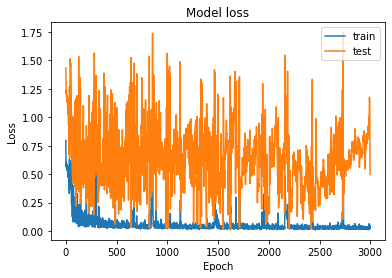

In [28]:
# Summarize history for loss
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

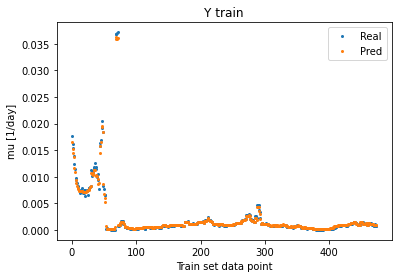

In [29]:
# Training data prediction
y_train_mu_pred = model.predict(X_train_S)
y_train_mu_pred_inv = target_scaler.inverse_transform(y_train_mu_pred)

# Training original
y_train_mu_series_inv = target_scaler.inverse_transform(y_train_mu_S)

# Training prediction comparison VS real training data
plt.plot(y_train_mu_series_inv, '.', markersize=4, label='Real')
plt.plot(y_train_mu_pred_inv, '.', markersize=4, label='Pred')
plt.title('Y train')
plt.ylabel('mu [1/day]')
plt.xlabel('Train set data point')
plt.legend(loc='best')
plt.show()

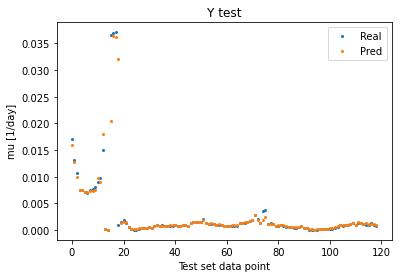

In [30]:
# Testing data prediction
y_pred = model.predict(X_test_S)
y_pred_inv = target_scaler.inverse_transform(y_pred)

# Testing original
y_test_mu_series_inv = target_scaler.inverse_transform(y_test_mu_S)

# Testing prediction comparison VS real testing data
plt.plot(y_test_mu_series_inv, '.', markersize=4, label='Real')
plt.plot(y_pred_inv, '.', markersize=4, label='Pred')
plt.title('Y test')
plt.ylabel('mu [1/day]')
plt.xlabel('Test set data point')
plt.legend(loc='best')
plt.show()

In [31]:
len(X_train), len(X_test)

(474, 119)

In [32]:
train_idx, test_idx

(array([  0,   2,   3,   4,   6,   7,   9,  10,  11,  12,  13,  16,  17,
         18,  19,  20,  21,  22,  23,  24,  27,  28,  29,  31,  33,  34,
         36,  37,  38,  39,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         50,  51,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,
         65,  66,  68,  69,  70,  71,  72,  73,  74,  75,  77,  78,  79,
         80,  81,  82,  85,  86,  87,  89,  91,  92,  93,  94,  96,  98,
         99, 100, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113,
        115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 127, 128, 129,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159,
        160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 175,
        176, 177, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190,
        191, 195, 199, 201, 202, 203, 205, 208, 209, 210, 211, 212, 213,
        214, 215, 216, 218, 219, 220, 221, 222, 223